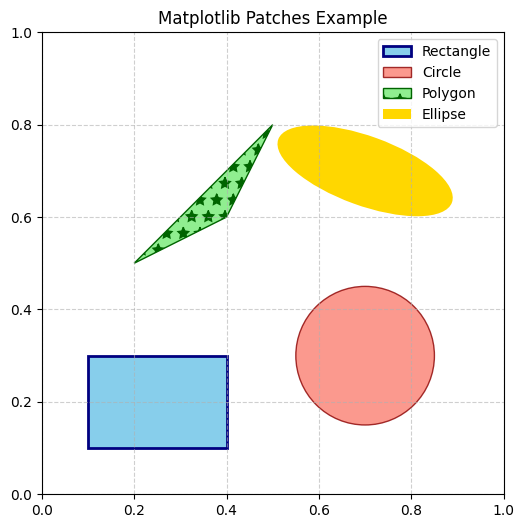

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# 1. Create Figure and Axes
fig, ax = plt.subplots(figsize=(6, 6)) # Make figure a bit bigger

# 2. & 3. Instantiate Patches & 4. Customize
rect = patches.Rectangle(
    (0.1, 0.1), 0.3, 0.2,
    facecolor='skyblue',
    edgecolor='navy',
    linewidth=2,
    label='Rectangle'
)

circle = patches.Circle(
    (0.7, 0.3), 0.15,
    facecolor='salmon',
    edgecolor='darkred',
    alpha=0.8, # Semi-transparent
    label='Circle'
)

poly_vertices = np.array([[0.2, 0.5], [0.5, 0.8], [0.4, 0.6]])
polygon = patches.Polygon(
    poly_vertices,
    closed=True,
    facecolor='lightgreen',
    hatch='*', # Add a hatch pattern
    edgecolor='darkgreen',
    label='Polygon'
)

ellipse = patches.Ellipse(
    (0.7, 0.7), 0.4, 0.15, angle=-20,
    facecolor='gold',
    label='Ellipse'
)


# 5. Add Patches to Axes
ax.add_patch(rect)
ax.add_patch(circle)
ax.add_patch(polygon)
ax.add_patch(ellipse)

# --- Plot Refinements ---
# Set axis limits to ensure all patches are visible
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Make sure circles/ellipses aren't distorted if axes scale differently
ax.set_aspect('equal', adjustable='box')

# Add title and legend
ax.set_title("Matplotlib Patches Example")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)


# 6. Display
plt.show()

In [10]:
import ast
def _c():
    print("_c called and executed")
s = '_c'
tree = ast.parse(s, mode='eval')
code_obj = compile(tree, filename="<ast>", mode='eval')
func = eval(code_obj)
func()

_c called and executed


In [ ]:
import random
random.seed(42)

In [ ]:
scramble = ['N']
moves = {'N':'N', 'F':'f', 'f':'F', 'B':'b', 'b':'B', 'U':'u', 'u':'U', 'D':'d', 'd':'D', 'L':'l', 'l':'L', 'R':'r', 'r':'R'}
idx = 0
same_move_count = 1
while idx < 27:
    scramble_move_choices = list(moves.keys())
    scramble_move_choices.remove('N')
    next_scramble_move = random.choice(scramble_move_choices)
    if next_scramble_move == scramble[idx]:
        same_move_count += 1
    else:
        same_move_count = 1
    if next_scramble_move != moves[scramble[idx]]:
        if not same_move_count > 2:
            scramble.append(next_scramble_move)
            idx += 1
print(scramble)

['N', 'F', 'R', 'b', 'U', 'f', 'b', 'f', 'D', 'U', 'd', 'R', 'u', 'B', 'u', 'u', 'b', 'R', 'U', 'r', 'f']


In [ ]:
scramble = ['N']
idx = 0
same_move_count = 1
while idx < 27:
    scramble_move_choices = list(moves.keys())
    scramble_move_choices.remove('N')
    next_scramble_move = random.choice(scramble_move_choices)
    if next_scramble_move == scramble[idx]:
        same_move_count += 1
    else:
        same_move_count = 1
    if next_scramble_move != moves[scramble[idx]]:
        if not same_move_count > 2:
            scramble.append(next_scramble_move)
            idx += 1
print(scramble)

In [5]:
def __F() : pass
def __F2(): pass
def __f() : pass
def __B() : pass
def __B2(): pass
def __b() : pass
def __U() : pass
def __U2(): pass
def __u() : pass
def __D() : pass
def __D2(): pass
def __d() : pass
def __L() : pass
def __L2(): pass
def __l() : pass
def __R() : pass
def __R2(): pass
def __r() : pass
def __N() : pass

move_map = {
    'L': __L, 'L2': __L2, 'L\'': __l, 'R': __R, 'R2': __R2, 'R\'': __r,
    'F': __F, 'F2': __F2, 'F\'': __f, 'B': __B, 'B2': __B2, 'B\'': __b,
    'U': __U, 'U2': __U2, 'U\'': __u, 'D': __D, 'D2': __D2, 'D\'': __d,
    'N': __N
}
def apply_moves(move_sequence):
        """Applies the moves to the cube state (piece_current_positions and piece_current_orientations)
        Args:
            move_sequence(list/str): ordered set of moves as a list or a string
        """
        if not isinstance(move_sequence, str):
            raise ValueError("argument to apply_moves must be a continuous string of valid moves")
        idx = 0
        moves_split = []
        while True:
            if idx <= len(move_sequence)-2 and move_sequence[idx:idx+2] in move_map.keys():
                moves_split.append(move_sequence[idx:idx+2])
                idx += 2
                if idx >= len(move_sequence):
                    break
            elif move_sequence[idx] in move_map.keys():
                moves_split.append(move_sequence[idx])
                idx += 1
                if idx >= len(move_sequence):
                    break
            else:
                raise ValueError(f"Invalid move at index {idx}")
        print(moves_split)
apply_moves("U2FF'L")

['U2', 'F', "F'", 'L']


In [5]:
a = "U' F2 L"
a.strip().split()
a

"U' F2 L"

In [6]:
import numpy as np
import sys
import json
import copy
import os
import ast
sys.path.insert(0, os.path.abspath('..'))
sys.path.insert(0, os.path.abspath('../src'))

try:
    from cube_simulator_full import CubeTracker, CubeColorizer
except ImportError:
    print("Error: Could not import CubeTracker or CubeColorizer.")
    print("Make sure 'cube_simulator_full.py' is accessible and updated for HTM.")
    exit()

def get_all_piece_positions(cube_state_array: np.ndarray) -> dict:
    """Creates a dictionary mapping piece ID to its (0-based) position tuple."""
    position_map = {}
    for i in range(3):
        for j in range(3):
            for k in range(3):
                piece_id = cube_state_array[i, j, k]
                # Ensure using 0-based IDs from the array
                position_map[piece_id] = (i, j, k)
    return position_map

def analyze_sequence_movements(sequence_to_analyze: str) -> dict:
    """
    Counts the number of times each piece moves during a given sequence,
    starting from a solved cube state.

    Args:
        sequence_to_analyze: A string representing the sequence of moves
                             in HTM notation (e.g., "F2 R' U B L2").

    Returns:
        A dictionary mapping piece ID (0-26, excluding center 13) to the
        number of times it changed position during the sequence. Returns
        an empty dict if initialization or parsing fails.
    """

    try:
        # Start with a fresh, solved cube tracker
        sim_cube = CubeTracker()
    except Exception as e:
        print(f"Failed to initialize CubeTracker: {e}")
        return {}

    # Initialize move counts for all pieces (0-26)
    # Use 0-based IDs internally consistent with numpy arrays
    move_counts = {pid: 0 for pid in range(27)}

    # Iterate through each move in the parsed sequence
    for move in sequence_to_analyze:
        # Get piece positions *before* applying the move
        positions_before = get_all_piece_positions(sim_cube.piece_current_ids_at_positions)

        # Apply the single HTM move
        try:
            sim_cube.apply_moves(move) # Use the tracker's method
        except ValueError:
            # This should not happen if parsing worked and moves are valid
            print(f"Internal Error: Invalid move '{move}' passed from parser to apply_moves.")
            continue # Skip this move

        # Get piece positions *after* applying the move
        positions_after = get_all_piece_positions(sim_cube.piece_current_ids_at_positions)

        # Compare positions and increment counts for pieces that moved
        for piece_id in range(27):
            if piece_id == 13: # Skip center piece
                 continue
            # Check if piece exists and if its position changed
            # Both maps should always contain keys 0-12 and 14-26
            if positions_before.get(piece_id) != positions_after.get(piece_id):
                move_counts[piece_id] += 1

    # Remove the irrelevant center piece count
    if 13 in move_counts:
        del move_counts[13]

    return move_counts

# --- Example Usage ---
if __name__ == "__main__":

    # Provide a known optimal sequence (e.g., for Superflip or another state)
    # Example: A known 20-move sequence (Superflip) - USE A VERIFIED SEQUENCE
    # Source: often found on speedcubing resources, e.g. https://alg.cubing.net/?alg=U_R2_F_B_R_B2_R_U2_L_B2_R_U-_D-_R2_F_R-_L_B2_U2_F2 //Generated by Cube Explorer 4.65s HTM optimal solver
    # IMPORTANT: Ensure the sequence notation matches your parser (e.g., U' vs U-)
    # Adjusting the sequence below to use ' notation
    known_optimal_sequence = "B' R' B2 U2 B2 U' B R F D' F R2 B' F L F' D' U2".split()

    # Or use the known 26-move QTM sequence (if your parser/tracker supports only QTM)
    # known_optimal_sequence_qtm = "..." # Replace with 26 QTM optimal sequence if needed

    print(f"Analyzing sequence: {known_optimal_sequence}")
    print(f"Sequence Length (HTM moves): {len(known_optimal_sequence)}") # Verify parser count

    try:
        piece_moves = analyze_sequence_movements(known_optimal_sequence)

        if piece_moves:
            print("\nPiece Movement Counts:")
            # Sort by piece ID for consistent output
            for piece_id in sorted(piece_moves.keys()):
                print(f"  Piece {piece_id:>2}: {piece_moves[piece_id]} moves")

            # Find the maximum number of moves any single piece made
            max_moves = max(piece_moves.values())
            # Find all pieces that moved the maximum number of times
            max_pieces = [pid for pid, count in piece_moves.items() if count == max_moves]
            print(f"\nMaximum moves by a single piece in this sequence: {max_moves}")
            print(f"Piece(s) with maximum moves: {sorted(max_pieces)}")

            # Identify piece types for max movers (optional)
            temp_cube = CubeTracker() # Need an instance to access piece lists
            corners = set(temp_cube.corner_ids)
            edges = set(temp_cube.edge_ids)

            # --- CORRECTED LOGIC ---
            max_corner_moves = 0
            max_edge_moves = 0

            # Iterate through ALL pieces that moved and their counts
            for pid, count in piece_moves.items():
                if pid in corners:
                    max_corner_moves = max(max_corner_moves, count)
                elif pid in edges:
                    max_edge_moves = max(max_edge_moves, count)
            # --- END CORRECTION ---

            print(f"  Max moves for a corner piece in this sequence: {max_corner_moves}")
            print(f"  Max moves for an edge piece in this sequence: {max_edge_moves}")

        else:
             print("\nNo movement data generated (check for errors).")

    except Exception as e:
        print(f"\nAn unexpected error occurred during analysis: {e}")
        import traceback
        traceback.print_exc()

Analyzing sequence: ["B'", "R'", 'B2', 'U2', 'B2', "U'", 'B', 'R', 'F', "D'", 'F', 'R2', "B'", 'F', 'L', "F'", "D'", 'U2']
Sequence Length (HTM moves): 18

Piece Movement Counts:
  Piece  0: 10 moves
  Piece  1: 8 moves
  Piece  2: 8 moves
  Piece  3: 5 moves
  Piece  4: 0 moves
  Piece  5: 5 moves
  Piece  6: 6 moves
  Piece  7: 5 moves
  Piece  8: 7 moves
  Piece  9: 5 moves
  Piece 10: 0 moves
  Piece 11: 4 moves
  Piece 12: 0 moves
  Piece 14: 0 moves
  Piece 15: 4 moves
  Piece 16: 0 moves
  Piece 17: 5 moves
  Piece 18: 12 moves
  Piece 19: 9 moves
  Piece 20: 11 moves
  Piece 21: 7 moves
  Piece 22: 0 moves
  Piece 23: 8 moves
  Piece 24: 9 moves
  Piece 25: 7 moves
  Piece 26: 9 moves

Maximum moves by a single piece in this sequence: 12
Piece(s) with maximum moves: [18]
  Max moves for a corner piece in this sequence: 12
  Max moves for an edge piece in this sequence: 9


In [ ]:
a = {1,2,3,4}
a.add(5)

TypeError: 'set' object is not subscriptable